In [22]:
import sys, os

# Ensure notebook can import from src/
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("Using project root:", project_root)


Using project root: C:\Users\Joseph\projects\asl-synthetic-dataset


In [23]:
import torch
from src.model.small_cnn import SmallCNN
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Path to your trained model
model_path = "../asl_model.pt"

# Load model
model = SmallCNN()
model.load_state_dict(torch.load(model_path, map_location="cpu"))
model.eval()

model


SmallCNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (class_head): Sequential(
    (0): Linear(in_features=32768, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=26, bias=True)
  )
  (dist_head): Sequential(
    (0): Linear(in_features=32768, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=1, bias=True)
  )
)

In [24]:
for name, param in model.named_parameters():
    print(f"{name:30} | shape: {tuple(param.shape)}")


features.0.weight              | shape: (32, 3, 3, 3)
features.0.bias                | shape: (32,)
features.3.weight              | shape: (64, 32, 3, 3)
features.3.bias                | shape: (64,)
features.6.weight              | shape: (128, 64, 3, 3)
features.6.bias                | shape: (128,)
class_head.0.weight            | shape: (256, 32768)
class_head.0.bias              | shape: (256,)
class_head.2.weight            | shape: (26, 256)
class_head.2.bias              | shape: (26,)
dist_head.0.weight             | shape: (128, 32768)
dist_head.0.bias               | shape: (128,)
dist_head.2.weight             | shape: (1, 128)
dist_head.2.bias               | shape: (1,)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.23200098..0.23144153].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.15754119..0.19810368].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.19455001..0.17767777].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.22454284..0.2048219].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.18308407..0.19993876].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.19091477..0.20524822].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range

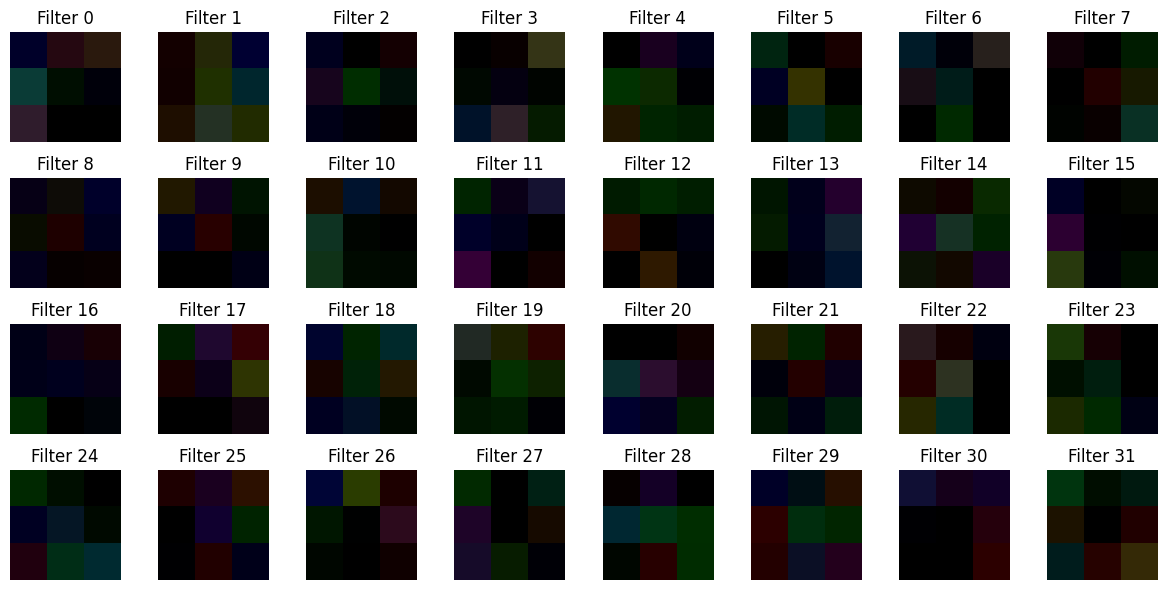

In [25]:
import numpy as np

conv0 = model.features[0]            # Conv2d(3 → 32)
weights = conv0.weight.detach().cpu().numpy()

fig, axs = plt.subplots(4, 8, figsize=(12, 6))
axs = axs.flatten()

for i in range(32):
    axs[i].imshow(weights[i].transpose(1,2,0), cmap="gray")
    axs[i].set_title(f"Filter {i}")
    axs[i].axis("off")

plt.tight_layout()
plt.show()


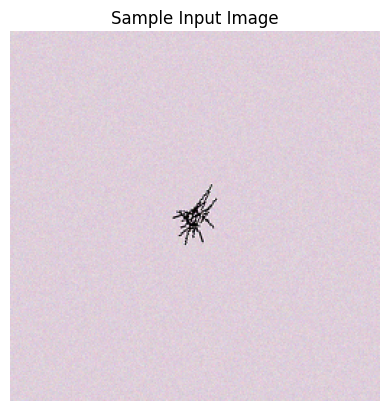

In [26]:
sample_path = "../asl_abstract_dataset/A/A_00000.png"

img = Image.open(sample_path).convert("RGB")  # MUST be RGB (3 channels)
plt.imshow(img)
plt.title("Sample Input Image")
plt.axis("off")
plt.show()


In [27]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),           # Converts to (3, 64, 64)
])

x = transform(img).unsqueeze(0)      # Add batch dimension

with torch.no_grad():
    class_logits, dist_pred = model(x)

pred_class = class_logits.argmax(dim=1).item()
pred_letter = chr(pred_class + ord("A"))

print("Predicted letter:", pred_letter)
print("Predicted distance:", float(dist_pred))


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x8192 and 32768x256)

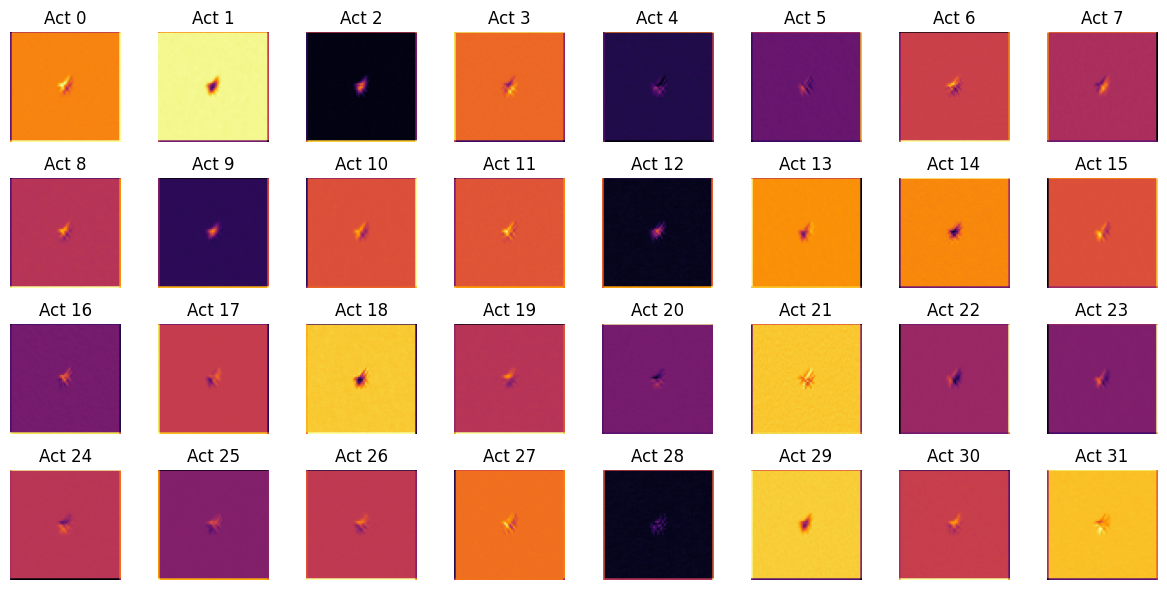

In [28]:
with torch.no_grad():
    activation = model.features[0](x)[0].cpu().numpy()

fig, axs = plt.subplots(4, 8, figsize=(12, 6))
axs = axs.flatten()

for i in range(32):
    axs[i].imshow(activation[i], cmap="inferno")
    axs[i].set_title(f"Act {i}")
    axs[i].axis("off")

plt.tight_layout()
plt.show()
